In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

In [79]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters


,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
1,resultsFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
2,movieLength,0
3,allowedMaxNumDetectionsPerFrame,3000
4,uniqueFilenameString,488nm_0
5,detectionFilename,Detection3D.mat
6,trackingFilename,trackedFeatures.mat
7,trackingCsvFilename,trackedFeatures.csv
8,trackColor,green
9,trackingBildFilename,tracks.bild


In [80]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [81]:
resultsFolder = getInputParameter(inputParameters,"resultsFolder")
trackingCsvFilename = getInputParameter(inputParameters,"trackingCsvFilename")
trackColor = getInputParameter(inputParameters,"trackColor")
trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
print(trackColor)

#hack
resultsFolder = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/"
trackColor = "red"

green


In [82]:
data = pd.read_csv(resultsFolder+'/'+trackingCsvFilename,header=0)
data.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]
data[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,123,2.401194e+02,3.449448e+02,4.499062e+01,1.935832e+04,7.636581e-02,7.634770e-02,7.634294e-02,8.918059e+02
1,1,70,2,0,2.398080e+02,3.455938e+02,4.452885e+01,2.285881e+04,5.624323e-02,5.640477e-02,5.648089e-02,7.705259e+02
2,1,70,3,121,2.396020e+02,3.457261e+02,4.401741e+01,2.191670e+04,6.825404e-02,6.812530e-02,6.801579e-02,8.966284e+02
3,1,70,4,90,2.400139e+02,3.457024e+02,4.475419e+01,2.231589e+04,5.023574e-02,5.033191e-02,5.030067e-02,6.751585e+02
4,1,70,5,85,2.397104e+02,3.454962e+02,4.467903e+01,2.411560e+04,5.471115e-02,5.492841e-02,5.473449e-02,7.897406e+02


In [83]:
len(data)

136917

## Write the .bild file

In [84]:
longtracks = data[data['tracklength'] >= 20]
print(len(longtracks))
print(len(np.unique(data['trackId'].values)))
print(np.unique(data['trackId'].values))

81519
14655
[    1     2     3 ..., 14653 14654 14655]


In [85]:
longtracks

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,123,2.401194e+02,3.449448e+02,4.499062e+01,1.935832e+04,7.636581e-02,7.634770e-02,7.634294e-02,8.918059e+02
1,1,70,2,0,2.398080e+02,3.455938e+02,4.452885e+01,2.285881e+04,5.624323e-02,5.640477e-02,5.648089e-02,7.705259e+02
2,1,70,3,121,2.396020e+02,3.457261e+02,4.401741e+01,2.191670e+04,6.825404e-02,6.812530e-02,6.801579e-02,8.966284e+02
3,1,70,4,90,2.400139e+02,3.457024e+02,4.475419e+01,2.231589e+04,5.023574e-02,5.033191e-02,5.030067e-02,6.751585e+02
4,1,70,5,85,2.397104e+02,3.454962e+02,4.467903e+01,2.411560e+04,5.471115e-02,5.492841e-02,5.473449e-02,7.897406e+02
5,1,70,6,86,2.395589e+02,3.455739e+02,4.444016e+01,2.054263e+04,6.031494e-02,6.029645e-02,6.049031e-02,7.370568e+02
6,1,70,7,95,2.396755e+02,3.456978e+02,4.440095e+01,1.833410e+04,6.512617e-02,6.510582e-02,6.520875e-02,7.152541e+02
7,1,70,8,0,2.399721e+02,3.454809e+02,4.507756e+01,2.056131e+04,5.926325e-02,5.962890e-02,5.926977e-02,7.324333e+02
8,1,70,9,96,2.392270e+02,3.448169e+02,4.472288e+01,1.859638e+04,5.521356e-02,5.443358e-02,5.448461e-02,6.040639e+02
9,1,70,10,59,2.393467e+02,3.446888e+02,4.458022e+01,1.710062e+04,5.725790e-02,5.679650e-02,5.689940e-02,5.789467e+02


In [86]:
#plot them all
import math

data = longtracks

filename=trackingBildFilename
file = open(resultsFolder+filename,'w') 

file.write(".transparency 0.5\n")
file.write(".color "+trackColor+"\n")

for trackID in np.unique(data['trackId'].values):
    
    line = ".comment trackID"+str(trackID)+"\n"
    file.write(line)
    
    
    track = data[data['trackId'] == trackID]
    tracklength = track['tracklength'].iloc[0]
    
    for i in range(1,tracklength):
        tzero = track.iloc[i-1]
        tone = track.iloc[i]
        

        # Data for a three-dimensional line
        x0 = float(tzero['x'])
        y0 = float(tzero['y'])
        z0 = float(tzero['z'])
        A0 = float(tzero['A'])
        
        x1 = float(tone['x'])
        y1 = float(tone['y'])
        z1 = float(tone['z'])
        A1 = float(tone['A'])
        
        if(math.isnan(x0) or math.isnan(y0) or math.isnan(z0) or math.isnan(x1) or math.isnan(y1) or math.isnan(z1)):
            line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
            print(line)
            continue
        
        
        #.arrow x1 y1 z1 x2 y2 z2 [r1 [r2 [rho]]] 
        
        line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
        file.write(line)
        
file.close()

.arrow 189.9504 310.9413 90.46159 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 200.4276 87.64874 105.3017 nan nan nan

.arrow nan nan nan 200.5653 88.32535 104.1142

.arrow 302.5504 701.4505 151.9519 nan nan nan

.arrow nan nan nan 299.3651 701.892 150.6766

.arrow 241.9402 392.8156 85.7935 nan nan nan

.arrow nan nan nan 241.6488 391.0608 85.35619

.arrow 257.201 291.0762 99.04307 nan nan nan

.arrow nan nan nan 256.183 289.5278 98.97355

.arrow 222.8634 364.9818 38.27013 nan nan nan

.arrow nan nan nan 224.3245 364.8203 38.78648

.arrow 255.8158 464.9853 50.03669 nan nan nan

.arrow nan nan nan 256.9196 465.9725 49.8898

.arrow 256.9196 465.9725 49.8898 nan nan nan

.arrow nan nan nan 254.9581 466.2133 48.65906

.arrow 270.4056 396.1365 81.12075 nan nan nan

.arrow nan nan nan 268.3695 398.8623 80.01621

.arrow 320.9611 362.2388 94.29752 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan



.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 277.4409 607.1629 132.8281 nan nan nan

.arrow nan nan nan 275.1892 604.7802 133.7558

.arrow 277.742 605.5845 131.2412 nan nan nan

.arrow nan nan nan 277.7301 605.4874 131.6612

.arrow 274.9744 607.9069 131.1771 nan nan nan

.arrow nan nan nan 275.1425 605.883 130.8417

.arrow 292.8044 410.6639 40.48286 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.

.arrow nan nan nan 391.4318 235.7746 84.2329

.arrow 388.9517 236.0119 83.07575 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 413.2096 200.8687 89.53401 nan nan nan

.arrow nan nan nan 412.1167 201.8548 89.78422

.arrow 346.8027 387.2091 94.1731 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 181.2092 201.8418 95.54798 nan nan nan

.arrow nan nan nan 178.9135 203.4721 96.90925

.arrow 181.8731 204.4024 95.26473 nan nan nan

.arrow nan nan nan 183.3432 204.4949 95.89455

.arrow 348.2731 360.0669 96.39797 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 345.9255 361.5442 99.51599

.arrow 346.4624 366.1828 96.53856 nan


.arrow 358.8457 696.5905 115.8247 nan nan nan

.arrow nan nan nan 360.814 697.4165 117.1759

.arrow 364.4103 696.6921 120.0888 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 204.105 506.4015 126.7636 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan na

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 298.7279 231.2948 46.58653 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan na

.arrow nan nan nan 197.0278 670.4052 157.2746

.arrow 195.2059 670.6829 154.3559 nan nan nan

.arrow nan nan nan 196.117 670.7703 154.7249

.arrow 196.117 670.7703 154.7249 nan nan nan

.arrow nan nan nan 195.029 672.4994 155.9643

.arrow 227.6753 316.8359 41.93239 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 229.8233 315.6123 40.18436

.arrow 227.2362 314.1359 40.55958 nan nan nan

.arrow nan nan nan 227.407 315.2752 39.90713

.arrow 227.3038 317.5893 40.18619 nan nan nan

.arrow nan nan nan 228.052 319.3345 41.10901

.arrow 229.526 318.417 39.70539 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 229.7524 318.5393 38.24564

.arrow 231.0758 320.4744 37.95559 nan nan nan

.arrow nan nan nan 230.4302 320.4019 38.19421

.arrow 283.3775 457.3639 43.23446 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 286.5612 454.4686 39.37582

.arrow 287.6147 454.97 39.44861 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 285.9992 453.920

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow n

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 326.2253 392.5654 74.24054 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 328.656 392.9099 74.54617

.arrow 328.0806 390.8658 74.24419 nan nan n


.arrow nan nan nan 261.1088 153.6989 113.9022

.arrow 261.9094 153.2142 115.7685 nan nan nan

.arrow nan nan nan 259.2566 152.5273 113.8091

.arrow 261.5612 153.8594 115.61 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 266.2235 148.3161 112.4773

.arrow 265.3171 146.6757 116.0042 nan nan nan

.arrow nan nan nan 267.063 149.1641 112.313

.arrow 267.063 149.1641 112.313 nan nan nan

.arrow nan nan nan 266.653 150.0704 111.5893

.arrow 66.03346 673.7496 197.3063 nan nan nan

.arrow nan nan nan 65.91295 673.5246 197.2088

.arrow 312.3886 189.5186 92.19391 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 310.4486 185.1844 88.95222

.arrow 241.2441 364.7228 101.834 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 242.6835 364.7253 101.7402

.arrow 242.6835 364.7253 101.7402 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 242.7498 366.362 101.2189

.arrow 242.7498 366.362 101.2189 nan nan nan

.arrow nan nan nan 242.3748 366.830


.arrow 240.6486 286.2035 104.022 nan nan nan

.arrow nan nan nan 240.7381 286.571 102.088

.arrow 243.1021 286.9948 103.295 nan nan nan

.arrow nan nan nan 242.1105 285.1869 104.5932

.arrow 244.365 285.4252 103.0479 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 246.2968 285.5215 103.3558

.arrow 246.5899 285.6194 103.0934 nan nan nan

.arrow nan nan nan 245.9296 285.3788 103.501

.arrow 242.6503 286.8804 102.921 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 244.2247 287.4184 102.5037

.arrow 244.9847 287.2505 102.0039 nan nan nan

.arrow nan nan nan 244.9828 287.3985 103.069

.arrow 261.0502 288.2399 108.3921 nan nan nan

.arrow nan nan nan 261.5196 286.0859 106.4634

.arrow 261.5196 286.0859 106.4634 nan nan nan

.arrow nan nan nan 261.1494 285.9583 106.9476

.arrow 261.3573 286.472 106.8739 nan nan nan

.arrow nan nan nan 263.3465 286.1271 107.9201

.arrow 263.6036 285.9387 107.3519 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 253.5996 147.6757 119.447 nan nan nan

.arrow nan nan nan 255.0992 147.6377 117.2897

.arrow 256.412 148.3205 117.1621 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 256.3504 148.0169 118.4885

.arrow 256.3504 148.0169 118.4885 nan nan nan

.arrow nan nan nan 255.9416 147.8548 117.343

.arrow 255.8304 147.6113 117.9096 nan nan nan

.arrow nan nan nan nan nan nan

.a

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 209.7553 145.2289 79.86194 nan nan nan

.arrow nan nan nan 211.2233 145.1271 79.16202

.arrow 212.1746 146.1331 79.0993 nan nan nan

.arrow nan nan nan 212.6445 145.9211 79.58433

.arrow 211.0678 145.2004 77.89182 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 211.8518 145.431 78.06922

.arrow 296.4313 464.7172 43.05114 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan 297.5881 463.1734 43.50846

.arrow 299.5382 462.26 42.74814 nan nan nan

.arrow nan nan nan 298.2416 461.7224 42.33727

.arrow 298.5349 462.1365 41.40621 nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow nan nan nan nan nan nan

.arrow 

## Do regular plotting

In [38]:
trackId = 8
track = data[data['trackId'] == trackId]
track['x'].values.astype(float)

array([ 281.0502,  279.5862,  279.7567,  279.862 ,  278.4256,  279.7624,
        280.8495,  281.8301,  279.8926,  279.3148,  279.1114,  280.9626,
        279.7341,  279.7539,  280.4895,  279.5627,  279.8381,  279.5187,
        279.9367,  278.749 ,  279.0526,  279.986 ,  278.0156,  279.1678,
        279.6244,  279.0201,  277.4998,  279.1733,  277.2906,  280.7027,
        282.6612,  281.0259,  280.2437,  281.113 ,  279.7364,  280.6819,
        279.3414,  279.9951,  277.9606,  278.9522,  278.4083,  280.3117,
        278.0776,  279.4636,  278.1899,  278.7619,  278.9977,  280.2314,
        280.6199,  280.8312,  282.5022,  281.646 ,  281.873 ,  280.9223,
        280.6158,  280.2917,  280.0819,  279.3467,  279.8351,  280.5028,
        279.815 ,  280.0031,  279.4568,  279.431 ,  278.4615,  276.5531,
        277.2064,  277.7364,  277.8895,  278.9425])

Text(0,0.5,'amplitude')

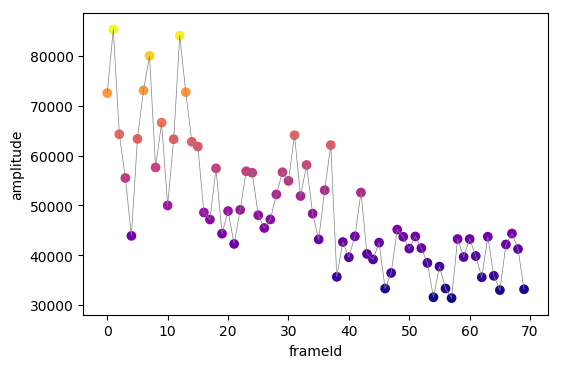

In [39]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=100)
ax = plt.axes()

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.plot(intensity,c='grey',lw=0.5)
ax.scatter(range(0,len(intensity)),intensity,c=intensity, cmap='plasma')
plt.xlabel('frameId')
plt.ylabel('amplitude')


Text(0.5,0,'y [px]')

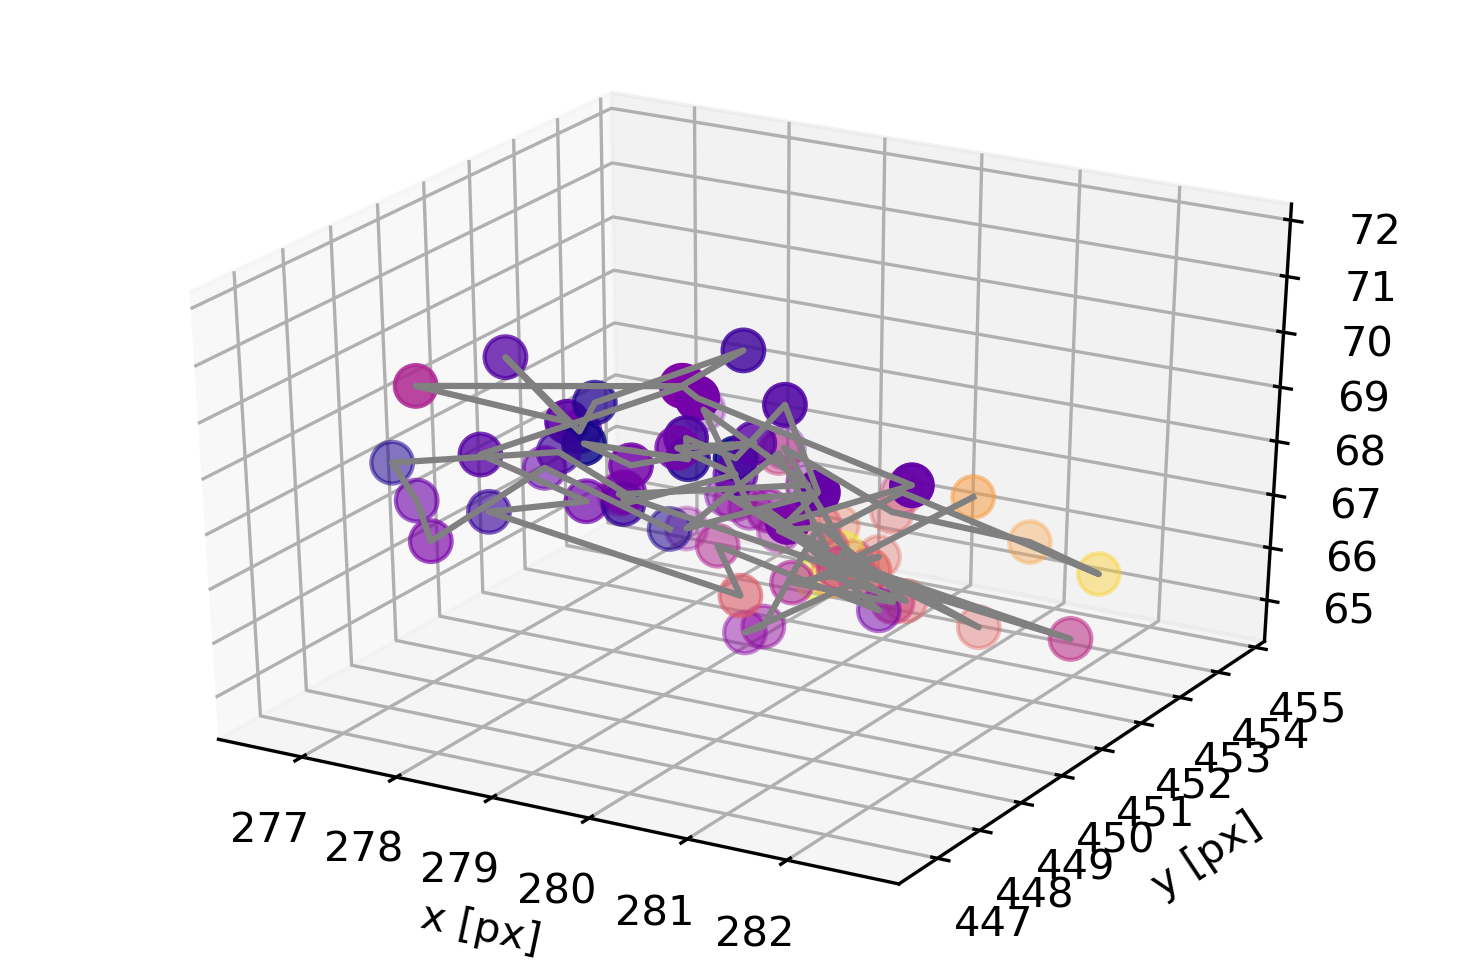

In [40]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=300)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)
ax.plot3D(x, y, z, 'grey')

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.scatter3D(x, y, z,c=intensity, cmap='plasma',s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
#plt.zlabel('z [px]')

In [41]:
def plotTrack(data,trackId,color='intensity'):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);

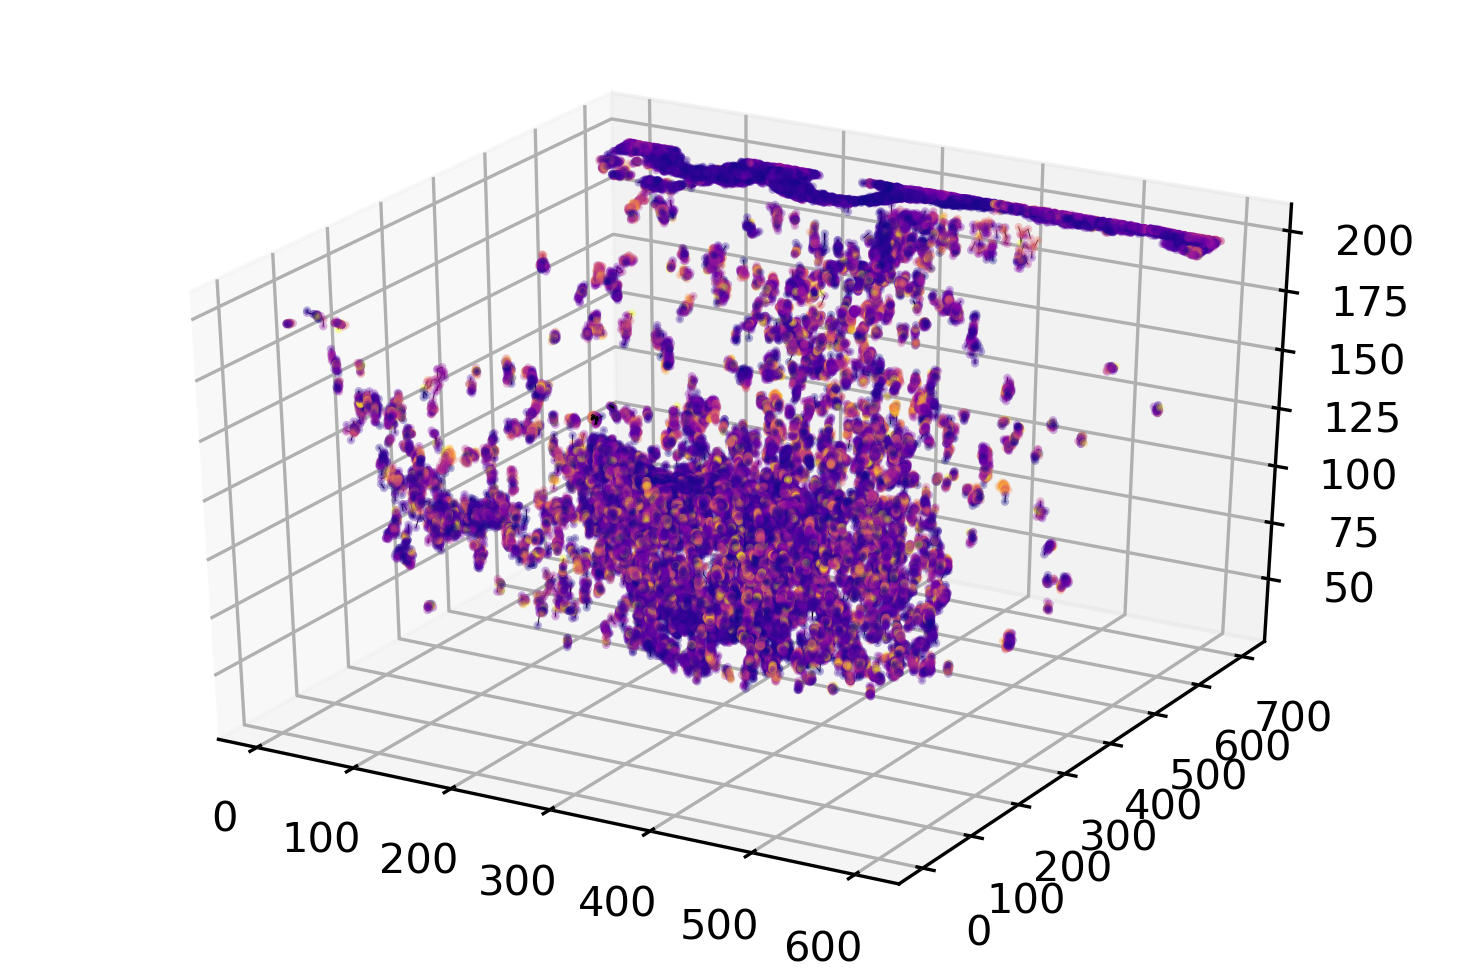

In [44]:
#plot them all

# WARNING: this takes ~3 min to plot.

plt.figure(dpi=300)

data = longtracks

ax = plt.axes(projection='3d')

for trackID in np.unique(data['trackId'].values):
    
    
    track = data[data['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.3);